# Image Segmentation

In [1]:
import cv2
from ultralytics import YOLO
from matplotlib import pyplot as plt
import numpy as np
import torch

In [2]:
# Load Segmentation model
model = YOLO('yolov8n-seg.pt')

100%|██████████████████████████████████████| 6.73M/6.73M [00:00<00:00, 17.9MB/s]


In [3]:
#output directory
output = 'images/output/'

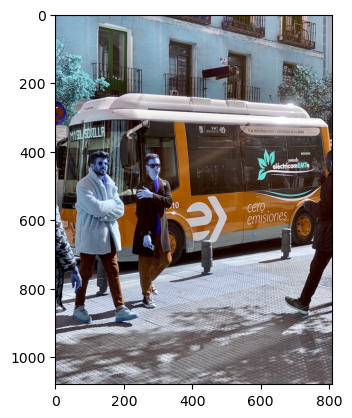

In [4]:
## load an image
img= cv2.imread('images/bus.jpg')
plt.imshow(img)
plt.show()

In [5]:
# Run Segmentation
results = model.predict(source=img.copy())


0: 640x480 4 persons, 1 bus, 1 skateboard, 78.9ms
Speed: 2.7ms preprocess, 78.9ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 480)


In [6]:
seg_classes = list(results[0].names.values())

In [7]:
## Extract known class
for result in results:
    # get array results
    masks = result.masks.data
    boxes = result.boxes.data
    
    # extract classes
    clss = boxes[:, 5]
    
    # get indices of results where class is 0 (people in COCO)
    people_indices = torch.where(clss == 0)
    
    # use these indices to extract the relevant masks
    people_masks = masks[people_indices]
    
    # scale for visualizing results
    people_mask = torch.any(people_masks, dim=0).int() * 255
    # save to file
    cv2.imwrite(str(output + 'merged_segs.jpg'), people_mask.cpu().numpy())

In [8]:
## Extract all classes
for result in results:
    # get array results
    masks = result.masks.data
    boxes = result.boxes.data
    
    # extract classes
    clss = boxes[:, 5]
    
    print("class,", clss)

    #Extract a single mask with all classes
    obj_indices = torch.where(clss != -1)
    obj_masks = masks[obj_indices]
    obj_mask = torch.any(obj_masks, dim=0).int() * 255
    cv2.imwrite(str(output+'images/output/all-masks.jpg'), obj_mask.cpu().numpy())

    #Extract all classes
    for i, seg_class in enumerate(seg_classes):

        obj_indices = torch.where(clss == i)
        obj_masks = masks[obj_indices]
        obj_mask = torch.any(obj_masks, dim=0).int() * 255

        cv2.imwrite(str(f'images/output/{seg_class}s.jpg'), obj_mask.cpu().numpy())

        #MASK FOR EACH INSTANCE OF A CLASS
        for i, obj_index in enumerate(obj_indices[0].numpy()):
            obj_masks = masks[torch.tensor([obj_index])]
            obj_mask = torch.any(obj_masks, dim=0).int() * 255
            cv2.imwrite(str(f'images/output/{seg_class}_{i}.jpg'), obj_mask.cpu().numpy())

class, tensor([ 0.,  0.,  0.,  5.,  0., 36.])
